# ***<p style="text-align: center;">New York's Yellow Taxi Data</p>***

- **VendorID :** A code indicating the TPEP provider that provided the record.    
- **tpep_pickup_datetime:** The date and time when the meter was engaged. 
- **tpep_dropoff_datetime:** The date and time when the meter was disengaged. 
- **passenger_count:** The number of passengers in the vehicle.      
- **trip_distance:** The elapsed trip distance in miles reported by the taximeter     
- **RatecodeID:** The final rate code in effect at the end of the trip.
    - 1 = Standard rate
    - 2 = JFK
    - 3 = Newark
    - 4 = Nassau or Westchester
    - 5 = Negotiated fare
    - 6 = Group ride 
    
- **store_and_fwd_flag:** This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
    - Y= store and forward trip
    - N= not a store and forward trip
     
     
- **PULocationID:** TLC Taxi Zone in which the taximeter was engaged     
- **DOLocationID:** TLC Taxi Zone in which the taximeter was disengaged      
- **payment_type:**  A numeric code signifying how the passenger paid for the trip.
    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip  
    
- **fare_amount:** The time-and-distance fare calculated by the meter.      
- **extra:** Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.    
- **mta_tax:** \$0.50 MTA tax that is automatically triggered based on the metered rate in use.
- **tip_amount:**  Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.     
- **tolls_amount:**   Total amount of all tolls paid in trip.   
- **improvement_surcharge:** $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
      
- **total_amount:** The total amount charged to passengers. Does not include cash tips.      
- **congestion_surcharge :** Total amount collected in trip for NYS congestion surcharge.      
- **airport_fee:** $1.25 for pick up only at LaGuardia and John F. Kennedy Airports

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Task 1

### 1.1 Reading the Data

In [2]:
jan_df = pd.read_parquet('yellow_tripdata_2023-01.parquet')
mar_df = pd.read_parquet('yellow_tripdata_2023-03.parquet')
jun_df = pd.read_parquet('yellow_tripdata_2023-06.parquet')

In [3]:
jan_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
# # Identify non-numeric columns
# jan_df.info()

# # Convert all columns to numeric if possible, coercing errors into NaN
# for col in jan_df.columns:
#     jan_df[col] = pd.to_numeric(jan_df[col], errors='coerce')

# # Drop any remaining non-numeric columns
# jan_df = jan_df.select_dtypes(include=[np.number])

# # Now, try computing the correlation matrix again
# correlation_matrix = jan_df.corr()


In [6]:
# correlation_matrix['total_amount']


In [7]:
# total_amount_correlation = correlation_matrix['total_amount'].sort_values(ascending=False)
# print(total_amount_correlation)

In [8]:
# jan_df['store_and_fwd_flag'] = jan_df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})


In [9]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['store_and_fwd_flag'] = le.fit_transform(df['store_and_fwd_flag'])


In [10]:
# jan_df.corr()

In [11]:
mar_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


In [12]:
jun_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.9,3.50,0.5,6.70,0.0,1.0,33.60,2.5,0.00
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.6,3.50,0.5,3.00,0.0,1.0,23.60,2.5,0.00
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.8,7.75,0.5,10.00,0.0,1.0,60.05,0.0,1.75
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.4,1.00,0.5,8.88,0.0,1.0,53.28,2.5,0.00
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.3,1.00,0.5,0.72,0.0,1.0,15.02,2.5,0.00


### Understanding and Comparing

In [13]:
jan_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,3066766,3066766,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
mean,1.730215e+00,2023-01-17 00:22:26.288164096,2023-01-17 00:38:06.427873792,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-01-09 16:21:57.249999872,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00
std,4.438480e-01,NaN,NaN,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01


__Analysis:__ These statistics are useful for understanding the central tendency, variability, and distribution of the data in each column. For example, we can see that the "passenger_count" column has a maximum value of 9, indicating that there was a trip with 9 passengers, but the median (50th percentile) value is 1, suggesting that most trips have only 1 passenger. 
We even notice there are some negative values, like in fare_amount, extra, total_amount and so on. This could be due to outliers which we will investigate later on. 

In [14]:
mar_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.403766e+06,3403766,3403766,3.316147e+06,3.403766e+06,3.316147e+06,3.403766e+06,3.403766e+06,3.403766e+06,3.403766e+06,3.403766e+06,3.403766e+06,3.403766e+06,3.403766e+06,3.403766e+06,3.403766e+06,3.316147e+06,3.316147e+06
mean,1.725320e+00,2023-03-16 11:32:30.578784768,2023-03-16 11:49:23.487819776,1.351417e+00,3.903871e+00,1.623961e+00,1.654540e+02,1.641003e+02,1.187310e+00,1.890845e+01,1.629128e+00,4.874393e-01,3.495237e+00,5.670059e-01,9.810640e-01,2.780343e+01,2.275176e+00,1.040236e-01
min,1.000000e+00,2001-01-01 00:06:49,2001-01-01 14:13:51,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.599000e+02,-7.500000e+00,-5.000000e-01,-8.000000e+01,-7.330000e+01,-1.000000e+00,-9.829500e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-03-08 18:48:02,2023-03-08 19:04:47,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.570000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-03-16 12:18:33,2023-03-16 12:38:00,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.060000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-03-24 08:55:29.750000128,2023-03-24 09:11:11.500000,1.000000e+00,3.380000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.120000e+01,2.500000e+00,5.000000e-01,4.340000e+00,0.000000e+00,1.000000e+00,2.976000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-04-05 20:17:42,2023-04-05 20:35:28,9.000000e+00,2.169870e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,2.100000e+03,1.375000e+01,4.000000e+00,9.843000e+02,1.770000e+02,1.000000e+00,2.100000e+03,2.500000e+00,1.250000e+00
std,4.588677e-01,NaN,NaN,8.861919e-01,1.916866e+02,7.358691e+00,6.373958e+01,6.967282e+01,5.334025e-01,1.825637e+01,1.842778e+00,1.020516e-01,3.996473e+00,2.121658e+00,1.892314e-01,2.286614e+01,7.745563e-01,3.503260e-01


__Analysis:__ This is almost similar to the jan data, however, the the length is different along with certain values. There are negative values in few of the columns in this dataset as well.  We can notice that the maximum payment_type is 5 which was not the case with the jan_df. This mean that there is an unknown source used to pay for the fare. There can be a possiblity that the a new payment method might have been introduced this month. By comparing the maximum fare_amount and total_amount with the Jan data, we can say there has been a rise in trip charges and if we look at the maximum trip_distance then its quite lower than the one in jan. Even if we are not comparing with the maximum value, we can check out the median, that also shows a significant difference in the 2 datasets.

In [15]:
jun_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.307234e+06,3307234,3307234,3.207347e+06,3.307234e+06,3.207347e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.207347e+06,3.207347e+06
mean,1.737262e+00,2023-06-15 18:09:27.394468608,2023-06-15 18:27:09.958311936,1.369012e+00,4.368790e+00,1.547159e+00,1.649028e+02,1.638013e+02,1.187126e+00,1.998804e+01,1.620755e+00,4.859043e-01,3.594915e+00,6.065670e-01,9.805643e-01,2.906873e+01,2.262730e+00,1.534284e-01
min,1.000000e+00,2002-12-31 23:03:19,2002-12-31 23:06:17,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.500000e+02,-7.500000e+00,-5.000000e-01,-9.500000e+01,-7.255000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,2023-06-08 09:12:42.249999872,2023-06-08 09:30:06.249999872,1.000000e+00,1.080000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-15 14:15:24.500000,2023-06-15 14:36:09,1.000000e+00,1.820000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.130000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-06-23 02:25:20,2023-06-23 02:40:05.750000128,1.000000e+00,3.540000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.260000e+01,2.500000e+00,5.000000e-01,4.480000e+00,0.000000e+00,1.000000e+00,3.130000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-07-01 00:42:13,2023-07-03 16:31:24,9.000000e+00,1.852505e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.869836e+05,1.425000e+01,5.750000e+00,7.118800e+02,6.655600e+02,1.000000e+00,3.869876e+05,2.500000e+00,1.750000e+00
std,4.477026e-01,NaN,NaN,8.959539e-01,2.280398e+02,6.762597e+00,6.404389e+01,7.005873e+01,5.478269e-01,2.136687e+02,1.869549e+00,1.068704e-01,4.203569e+00,2.252982e+00,1.941525e-01,2.141569e+02,7.960739e-01,5.027511e-01


__Analysis:__ In the month of June, we can see that the maximum trip_distance has reduced as compared to that of march or Jan. However, if we check the median, it's higher than the rest this can probably indicate that the people used taxis for longer trips. Just like in march, there is a rise in the maximum fare_amount but the median is the same. However, if we look at the total_amount, there is a rise in the average pay and the maximum pay, suggesting that the taxi fares have risen. The average number of passenger has all risen, this could suggest that taxi were prefered by people who had to travel longer distance and in more number of people.

#### Checking if the data has any missing values

In [16]:
print("Size of the Jan Dataset: ",len(jan_df), "\nJanuary Missing Data\n", jan_df.isna().sum())
print("\n\nSize of the March Dataset: ",len(mar_df),"\nMarch Missing Data\n",mar_df.isna().sum())
print("\n\nSize of the June Dataset: ",len(jun_df),"\nJune Missing Data\n", jun_df.isna().sum())

Size of the Jan Dataset:  3066766 
January Missing Data
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64


Size of the March Dataset:  3403766 
March Missing Data
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          87619
trip_distance                0
RatecodeID               87619
store_and_fwd_flag       87619
PULocationID                 0
DOLocationID                 0
pay

#### Visualizing Missing values

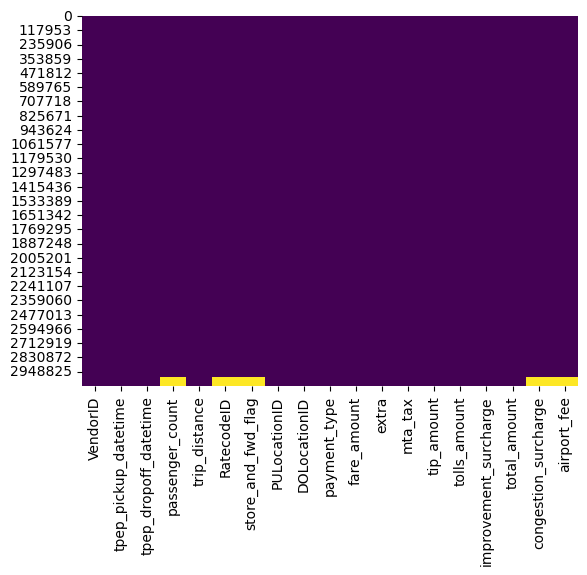

In [17]:
# Missing values of jan data
sns.heatmap(jan_df.isnull(), cbar=False, cmap='viridis')
plt.show()

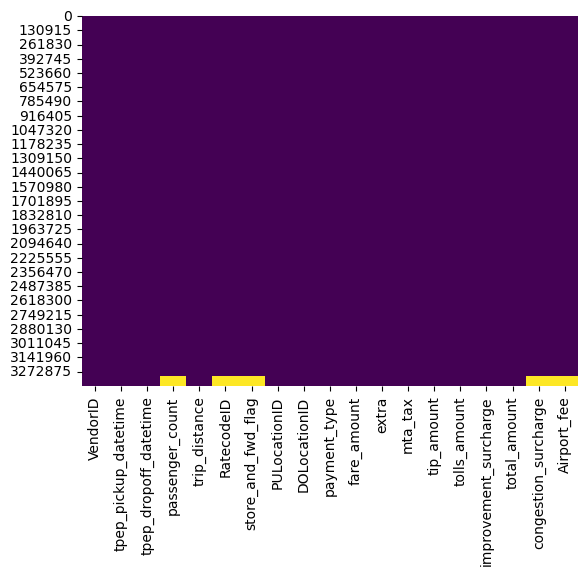

In [18]:
# Missing values of jan data
sns.heatmap(mar_df.isnull(), cbar=False, cmap='viridis')
plt.show()

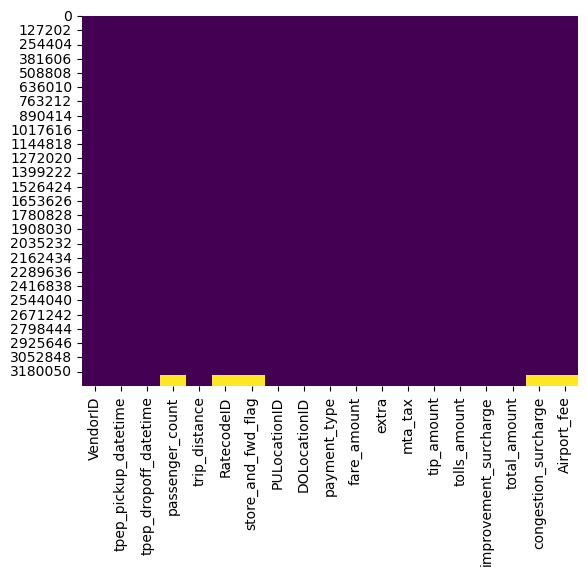

In [19]:
# Missing values of jan data
sns.heatmap(jun_df.isnull(), cbar=False, cmap='viridis')
plt.show()

__Note:__ We notice the last few rows are the ones with missing values of each dataset.

### Comparing the Fare amount for each month

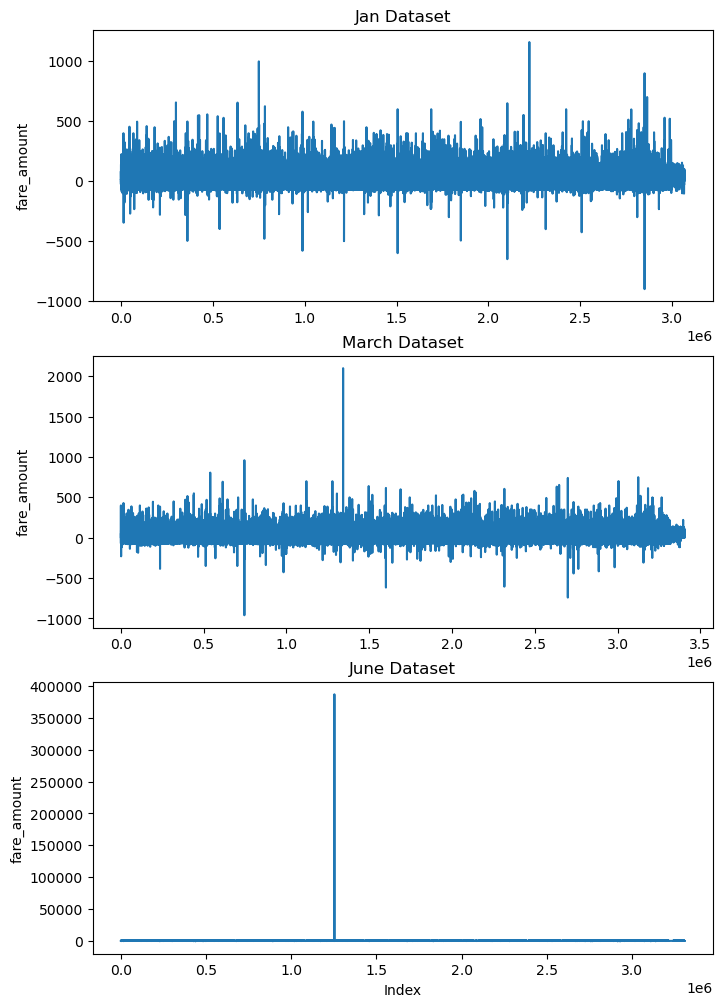

In [20]:
#plotting and comparing all the fareamounts 
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(jan_df['fare_amount'])
axs[0].set_ylabel('fare_amount')
axs[0].set_title('Jan Dataset')

axs[1].plot(mar_df['fare_amount'])
axs[1].set_ylabel('fare_amount')
axs[1].set_title('March Dataset')

axs[2].plot(jun_df['fare_amount'])
axs[2].set_xlabel('Index')
axs[2].set_ylabel('fare_amount')
axs[2].set_title('June Dataset')

plt.show()


__Analysis:__ The graphs show how the datasets vary from each other. We can notice how there are negative values in the month of Jan and March. In June there are negative values too but since one of the values is so high that rest other data appears to be in a single line.

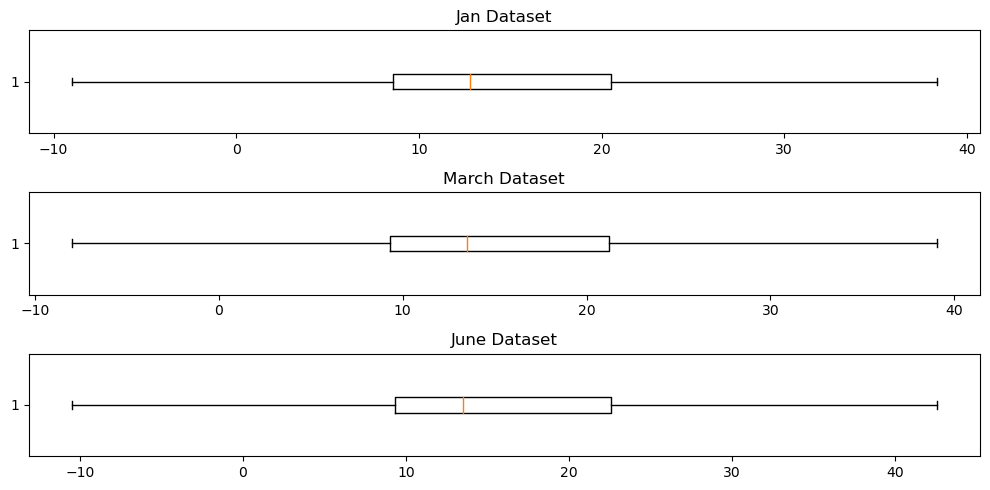

In [21]:
# Creating a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 5))

# Plotting and removing the outliers 
axs[0].boxplot(jan_df['fare_amount'], showfliers=False,  vert=False)
axs[0].set_title('Jan Dataset')

axs[1].boxplot(mar_df['fare_amount'], showfliers=False,  vert=False)
axs[1].set_title('March Dataset')

axs[2].boxplot(jun_df['fare_amount'], showfliers=False,  vert=False)
axs[2].set_title('June Dataset')

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

__Note:__ The outliers of the datasets have been removed in order to analyze them. It seems that there is a difference among the datasets. The June dataset is wide spread as compared to the others. 

### Comparing all types of charges by month

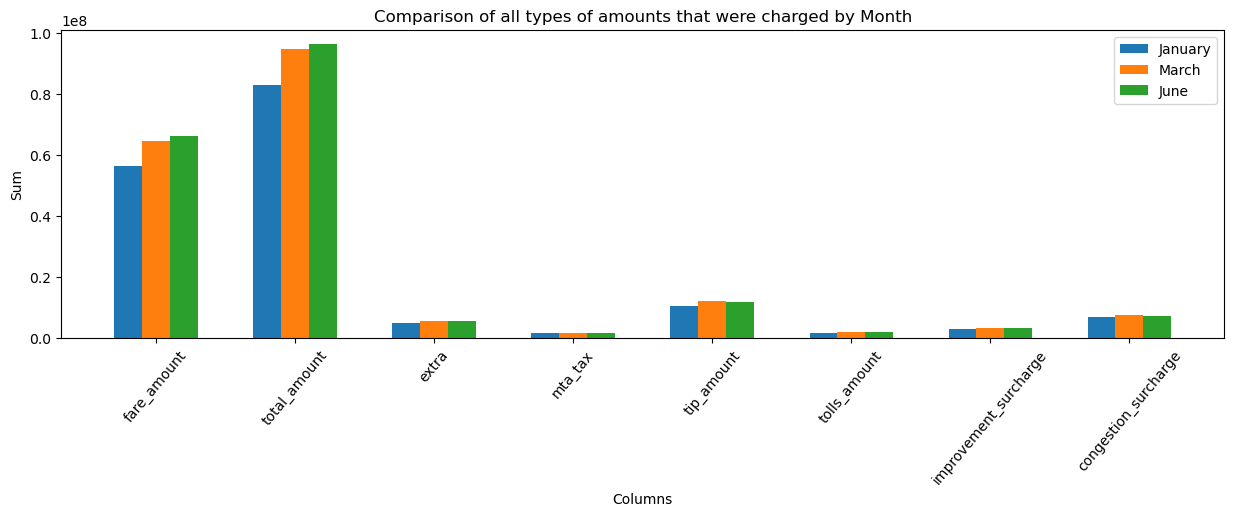

In [22]:
plt.figure(figsize=(15, 4))

# Creating a list of column names 
columns = ['fare_amount', 'total_amount', 'extra','mta_tax','tip_amount',
           'tolls_amount','improvement_surcharge','congestion_surcharge']

# list of months
months = ['January', 'March', 'June']

# list of x positions for the bars
x = np.arange(len(columns))

# categorized bar chart for each month
for i, month_df in enumerate([jan_df, mar_df, jun_df]):
    month_sum = month_df[columns].sum()
    plt.bar(x + i * 0.2, month_sum, width=0.2, label=months[i])

# labels 
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Comparison of all types of amounts that were charged by Month')

plt.xticks(x + 0.2, columns, rotation=50)
plt.legend()
plt.show()


__Analysis:__ As we compare the bar graph of all the charges, we notice a rise in the fare_amount and the total_amount. The tip_amount also had risen but when the rates of rose in the month of June, people gave less tip as compared to the previuos month. 

### Comparing all miscellineous charges

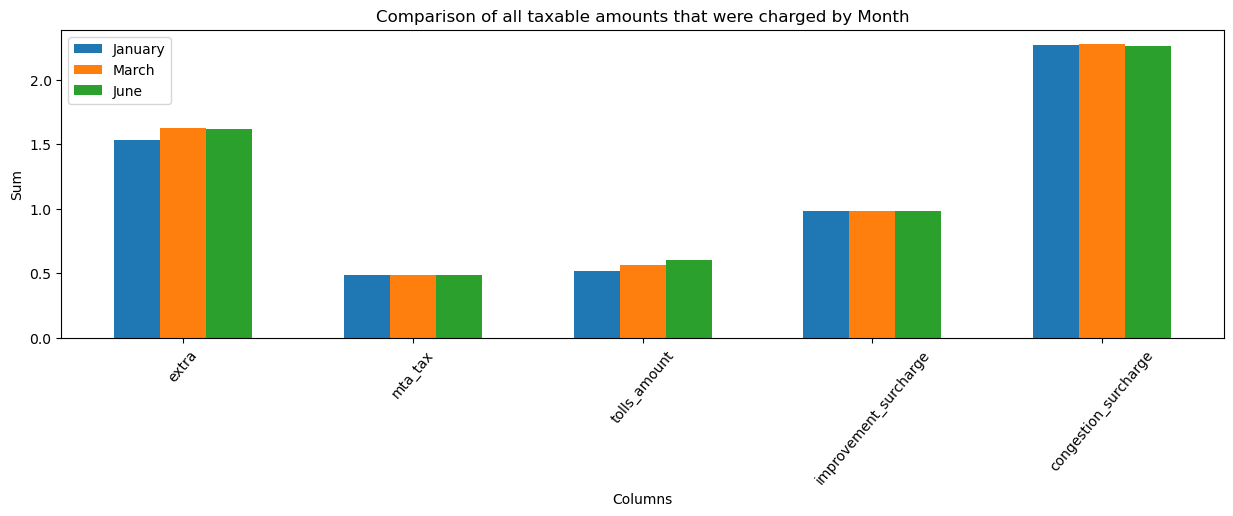

In [23]:
plt.figure(figsize=(15, 4))

# list of columns
columns = ['extra','mta_tax',
           'tolls_amount','improvement_surcharge','congestion_surcharge']
months = ['January', 'March', 'June']
x = np.arange(len(columns))

for i, month_df in enumerate([jan_df, mar_df, jun_df]):
    month_mean = month_df[columns].mean()
    plt.bar(x + i * 0.2, month_mean, width=0.2, label=months[i])

# labels
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Comparison of all taxable amounts that were charged by Month')
plt.xticks(x + 0.2, columns, rotation=50)
plt.legend()
plt.show()


__Analysis:__ Looking at the other charges, there isn't much difference between them. The mta_tax and improvemnet_surcharge stayed the same. However, the tolls_amount increased. There is a slight difference in the congestion_surcharge and the extra amount paid by the customer varied each month.

### Comparing Payment Methond in each month

In [24]:
# Payment Types
print("Jan Dataset\n",jan_df['payment_type'].value_counts())
print("\n Mar Dataset\n",mar_df['payment_type'].value_counts())
print("\n Jun Dataset\n",jun_df['payment_type'].value_counts())

Jan Dataset
 payment_type
1    2411462
2     532241
0      71743
4      33297
3      18023
Name: count, dtype: int64

 Mar Dataset
 payment_type
1    2689846
2     566070
0      87619
4      38646
3      21584
5          1
Name: count, dtype: int64

 Jun Dataset
 payment_type
1    2592256
2     552611
0      99887
4      41185
3      21294
5          1
Name: count, dtype: int64


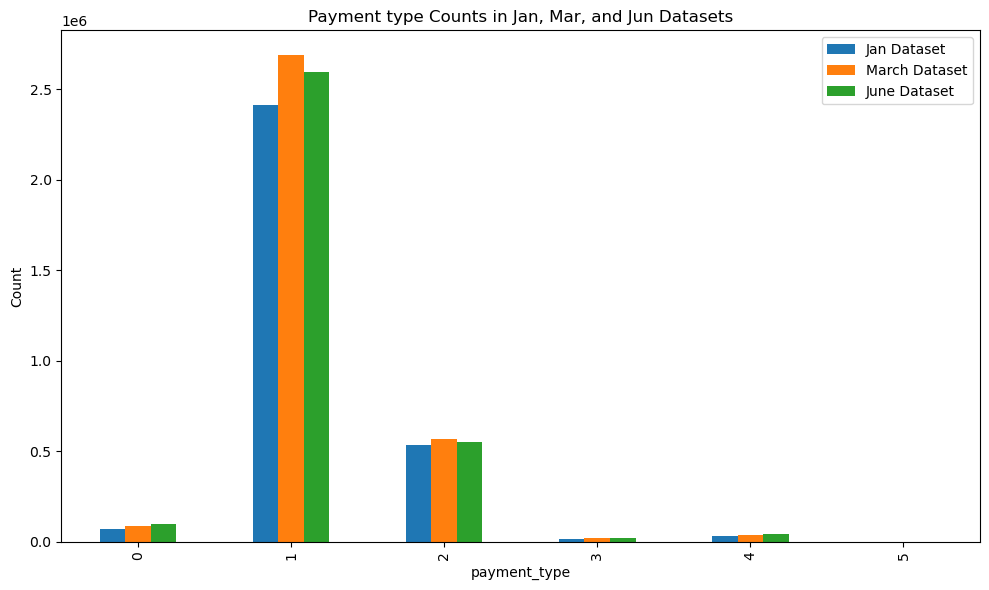

In [25]:
# Creating a DataFrame tfor RatecodeID 
data = {'Jan Dataset': jan_df['payment_type'].value_counts(),
        'March Dataset': mar_df['payment_type'].value_counts(),
        'June Dataset': jun_df['payment_type'].value_counts()}
df = pd.DataFrame(data)
# Plotting
df.plot(kind='bar',  figsize=(10, 6))
plt.xlabel('payment_type')
plt.ylabel('Count')
plt.title('Payment type Counts in Jan, Mar, and Jun Datasets')

plt.tight_layout()
plt.show()


__Analysis:__ We can see that how so many people used to pay by credit cards (1). There were a few to pay by cash (2). Some even had disputes(3) when the time came to pay. Due to which, there was a negative entry in the other charges. 
We also notice there is no entry for Unknown payment method or Voided trip. However, there is a value of 0 that basically is the null values in the dataset. 

### Comparing RatecodeID by Month

In [26]:
#RatecodezID
print("Jan Dataset\n",jan_df['RatecodeID'].value_counts())
print("\n Mar Dataset\n",mar_df['RatecodeID'].value_counts())
print("\n Jun Dataset\n",jun_df['RatecodeID'].value_counts())

Jan Dataset
 RatecodeID
1.0     2839305
2.0      114239
5.0       15043
99.0      13106
3.0        8958
4.0        4366
6.0           6
Name: count, dtype: int64

 Mar Dataset
 RatecodeID
1.0     3137278
2.0      128402
99.0      18783
5.0       15587
3.0       10634
4.0        5460
6.0           3
Name: count, dtype: int64

 Jun Dataset
 RatecodeID
1.0     3020582
2.0      133708
5.0       18718
99.0      15316
3.0       11697
4.0        7321
6.0           5
Name: count, dtype: int64


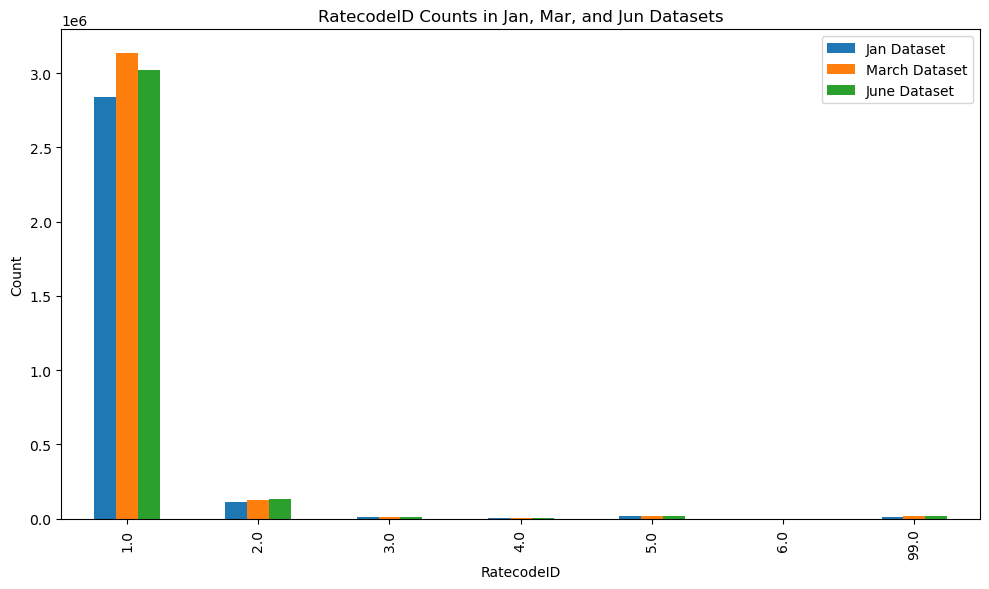

In [27]:
# DataFrame 
data = {'Jan Dataset': jan_df['RatecodeID'].value_counts(),
        'March Dataset': mar_df['RatecodeID'].value_counts(),
        'June Dataset': jun_df['RatecodeID'].value_counts()}
df = pd.DataFrame(data)
# Plotting 
df.plot(kind='bar',  figsize=(10, 6))
plt.xlabel('RatecodeID')
plt.ylabel('Count')
plt.title('RatecodeID Counts in Jan, Mar, and Jun Datasets')
plt.tight_layout()
plt.show()


__Analysis:__ Most of the trips were charged a Standard Rate (1). There were very few that were negotiated (5). The second most popular was the JFK (2). We even notice that there is an entry of 99.0, this could be an outlier which needs to be treated.

## Task 2

### 2.1 Jan's Missing values

In [28]:
missing = jan_df.isna().sum()
missing = missing[missing>0]
print("Size of the Jan Dataset: ",len(jan_df), "\nJanuary Missing Data\n", missing)

Size of the Jan Dataset:  3066766 
January Missing Data
 passenger_count         71743
RatecodeID              71743
store_and_fwd_flag      71743
congestion_surcharge    71743
airport_fee             71743
dtype: int64


### Dealing with the Missing Values

We have a few options, either we delete the rows with the missing values or we treat them by replacing the values with their mean/median/mode. We could also replace them with random numbers.


#### Passenger Count

In [29]:
jan_df['passenger_count'].value_counts()

passenger_count
1.0    2261400
2.0     451536
3.0     106353
4.0      53745
0.0      51164
5.0      42681
6.0      28124
8.0         13
7.0          6
9.0          1
Name: count, dtype: int64

We can notice that most of the trips made by a single passenger. There were hardly times where the passenger count increased to 8 or more. Furthermore, there is an entry of 0.0, this could mean that the number of passenger was not counted but they were charged. 

In [30]:
a = jan_df[jan_df['passenger_count'] == 0.0]
a

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.9,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.00,1.0,20.85,0.0,1.25
485,1,2023-01-01 00:22:18,2023-01-01 00:28:17,0.0,1.3,1.0,N,170,107,1,8.6,3.50,0.5,2.70,0.00,1.0,16.30,2.5,0.00
486,1,2023-01-01 00:30:59,2023-01-01 00:34:46,0.0,1.0,1.0,N,79,107,1,6.5,3.50,0.5,2.30,0.00,1.0,13.80,2.5,0.00
487,1,2023-01-01 00:36:19,2023-01-01 00:43:46,0.0,2.3,1.0,N,107,232,1,11.4,3.50,0.5,3.25,0.00,1.0,19.65,2.5,0.00
488,1,2023-01-01 00:54:23,2023-01-01 01:08:18,0.0,2.1,1.0,N,79,231,2,12.8,3.50,0.5,0.00,0.00,1.0,17.80,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994708,1,2023-01-31 23:30:21,2023-01-31 23:38:08,0.0,1.5,1.0,N,142,239,1,10.0,3.50,0.5,1.50,0.00,1.0,16.50,2.5,0.00
2994709,1,2023-01-31 23:51:24,2023-02-01 00:02:51,0.0,2.7,1.0,N,264,263,1,14.9,3.50,0.5,4.95,0.00,1.0,24.85,2.5,0.00
2994722,1,2023-01-31 23:04:00,2023-01-31 23:11:47,0.0,2.1,1.0,N,186,125,2,10.7,3.50,0.5,0.00,0.00,1.0,15.70,2.5,0.00
2994751,1,2023-01-31 23:16:45,2023-01-31 23:38:32,0.0,8.6,1.0,N,138,164,1,36.6,9.75,0.5,10.85,6.55,1.0,65.25,2.5,1.25


In [31]:
print(jan_df['passenger_count'].mean())
print(jan_df['passenger_count'].median())
print(jan_df['passenger_count'].mode().values[0])

1.3625321074328978
1.0
1.0


In [32]:
import random

missing_values = jan_df[jan_df['passenger_count'].isnull()].index

for i in missing_values:
   # jan_df.at[i, 'passenger_count'] = random.choice([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
    choices = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
    if random.random() < 0.001: # choosing 0.1% of the data 
        jan_df.at[i, 'passenger_count'] = random.choice([7.0, 8.0, 9.0])
    else:
        jan_df.at[i, 'passenger_count'] = random.choice(choices)

jan_df['passenger_count'].value_counts()

passenger_count
1.0    2273367
2.0     463537
3.0     118314
4.0      65629
5.0      54701
0.0      51164
6.0      39969
8.0         38
7.0         30
9.0         17
Name: count, dtype: int64

In [33]:
#treating 0.0 as missing values 
not_counted = jan_df[jan_df['passenger_count'] == 0.0].index


for j in not_counted:
    choices = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
    if random.random() < 0.01: # choosing 1% of the data 
        jan_df.at[j, 'passenger_count'] = random.choice([7.0, 8.0, 9.0])
    else:
        jan_df.at[j, 'passenger_count'] = random.choice(choices)


jan_df['passenger_count'].value_counts()

passenger_count
1.0    2281784
2.0     472028
3.0     126734
4.0      74089
5.0      63080
6.0      48403
8.0        234
7.0        224
9.0        190
Name: count, dtype: int64

### RatecodeID

RatecodeID: The final rate code in effect at the end of the trip.

1 = Standard rate
2 = JFK
3 = Newark
4 = Nassau or Westchester
5 = Negotiated fare
6 = Group ride

In [34]:
jan_df['RatecodeID'].value_counts()

RatecodeID
1.0     2839305
2.0      114239
5.0       15043
99.0      13106
3.0        8958
4.0        4366
6.0           6
Name: count, dtype: int64

In [35]:
print(jan_df['RatecodeID'].mean())
print(jan_df['RatecodeID'].median())
print(jan_df['RatecodeID'].mode().values[0])

1.4974395856058536
1.0
1.0


In [36]:
# Using median to replace the null values
jan_df['RatecodeID'].fillna(1.0, inplace = True)

In [37]:
jan_df['RatecodeID'].value_counts()

RatecodeID
1.0     2911048
2.0      114239
5.0       15043
99.0      13106
3.0        8958
4.0        4366
6.0           6
Name: count, dtype: int64

### Store and Forward
Y and N

In [38]:
jan_df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    2975020
Y      20003
Name: count, dtype: int64

In [39]:
print(jan_df['store_and_fwd_flag'].mode().values[0])

N


__Note:__ Since it is a categorical variable, we can use mode to fill up the null values. However, I don't want the results to be biased towards the most common answer.

In [40]:
# #jan_df['store_and_fwd_flag'].fillna(jan_df['store_and_fwd_flag'].mode().values[0], inplace = True)

# missing_values = jan_df[jan_df['store_and_fwd_flag'].isnull()].index

# for i in missing_values:
#     jan_df.at[i, 'store_and_fwd_flag'] = random.choice(['Y', 'N'])

# jan_df['store_and_fwd_flag'].value_counts()

### Congestion Surcharge

In [41]:
jan_df['congestion_surcharge'].value_counts()

congestion_surcharge
 2.5    2744268
 0.0     231037
-2.5      19718
Name: count, dtype: int64

In [42]:
#filling missing values 0 
jan_df['congestion_surcharge'].fillna(0.0, inplace = True)

jan_df['congestion_surcharge'].value_counts()

congestion_surcharge
 2.5    2744268
 0.0     302780
-2.5      19718
Name: count, dtype: int64

### Airport fees

In [43]:
jan_df['airport_fee'].value_counts()

airport_fee
 0.00    2730456
 1.25     260960
-1.25       3607
Name: count, dtype: int64

In [44]:
#filling missing values with median
jan_df['airport_fee'].fillna(jan_df['airport_fee'].median(), inplace = True)
jan_df['airport_fee'].value_counts()

airport_fee
 0.00    2802199
 1.25     260960
-1.25       3607
Name: count, dtype: int64

In [45]:
# Checking the null values
jan_df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee                  0
dtype: int64

### 2.2 Noisy Data

Refers to erroneous value. It can be outlers, unnecessary data or negative values; basically meaningless data.

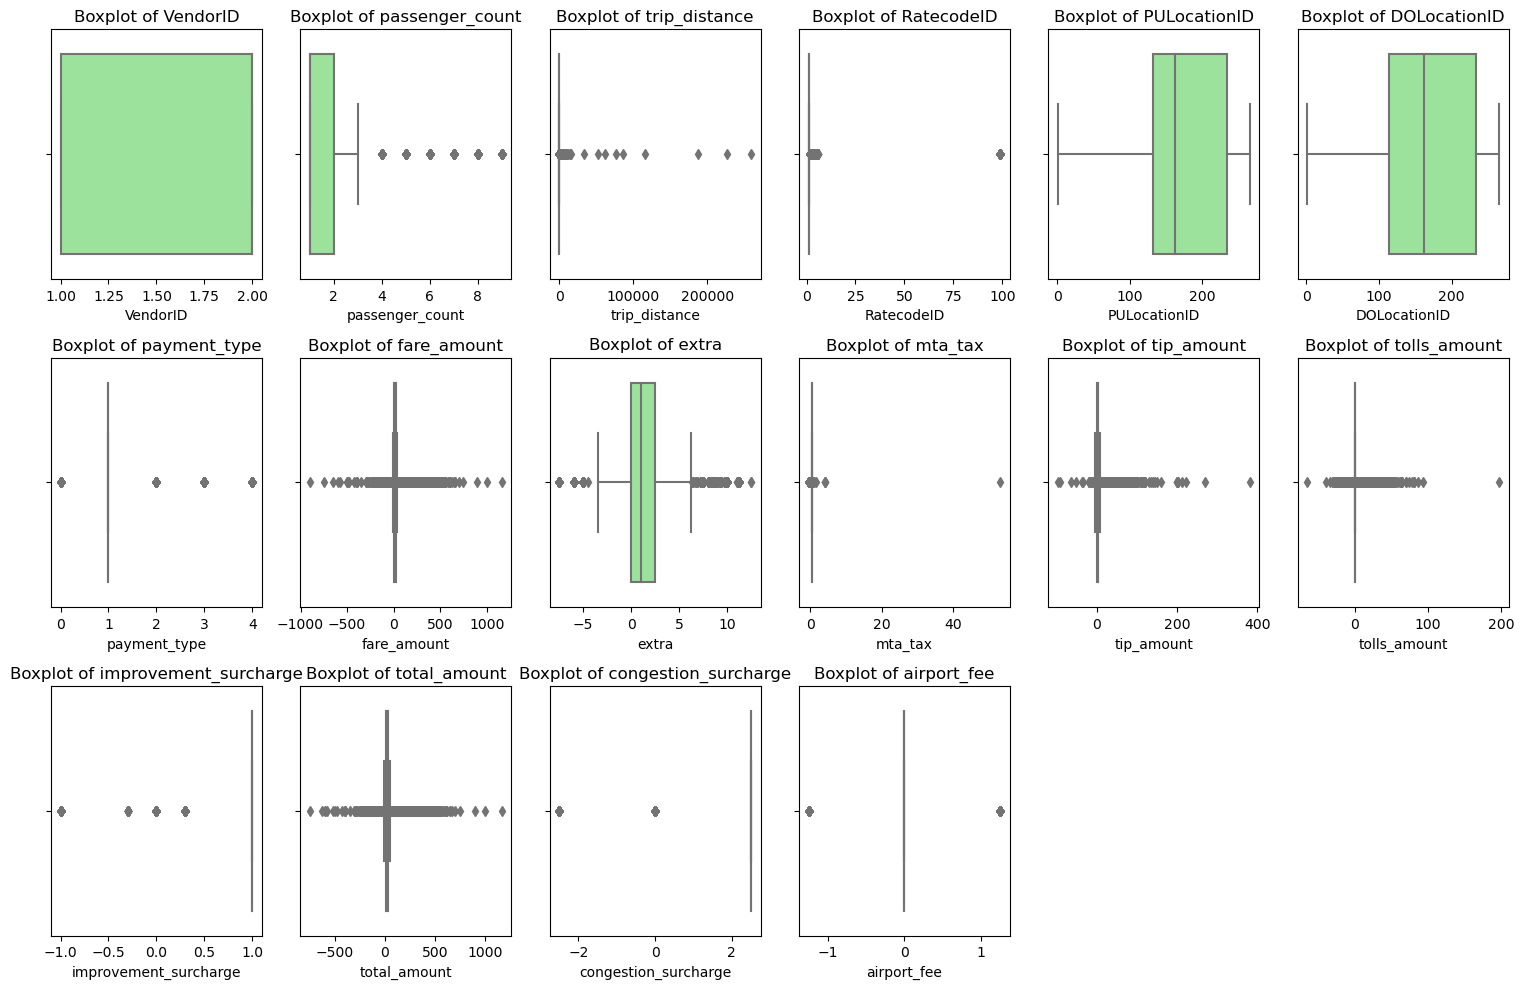

In [46]:
import warnings
warnings.filterwarnings("ignore")

columns_to_plot = jan_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot.columns):
    plt.subplot(3, 6, i + 1)  # 3 rows, 6 columns for the subplots
    sns.boxplot(x=columns_to_plot[column], color='lightgreen', orient='v')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


We notice that there are negative values in some of the features. We will investigate this.

### Negative Values

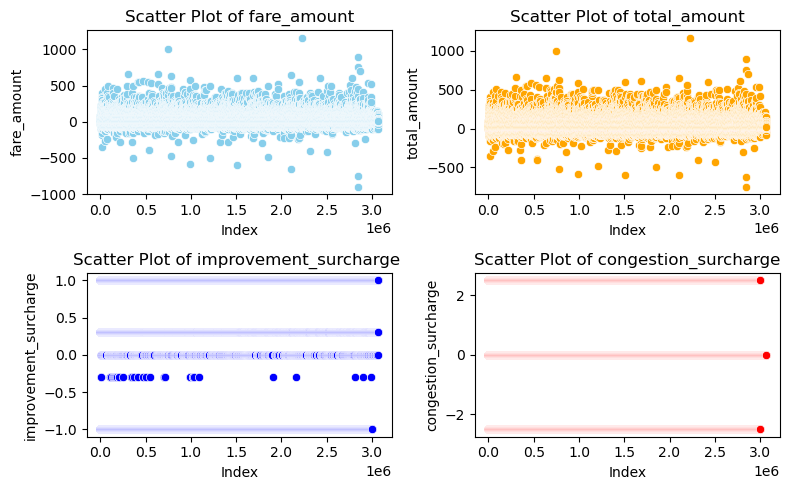

In [47]:
#subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# 'fare_amount'
sns.scatterplot(x=range(len(jan_df)), y=jan_df['fare_amount'], color='skyblue', ax=axes[0,0])
axes[0,0].set_title('Scatter Plot of fare_amount')
axes[0,0].set_xlabel('Index')
axes[0,0].set_ylabel('fare_amount')

# 'total_amount'
sns.scatterplot(x=range(len(jan_df)), y=jan_df['total_amount'], color='orange', ax=axes[0,1])
axes[0,1].set_title('Scatter Plot of total_amount')
axes[0,1].set_xlabel('Index')
axes[0,1].set_ylabel('total_amount')

# 'improvement_surcharge'
sns.scatterplot(x=range(len(jan_df)), y=jan_df['improvement_surcharge'], color='blue', ax=axes[1,0])
axes[1,0].set_title('Scatter Plot of improvement_surcharge ')
axes[1,0].set_xlabel('Index')
axes[1,0].set_ylabel('improvement_surcharge')

# 'congestion_surcharge'
sns.scatterplot(x=range(len(jan_df)), y=jan_df['congestion_surcharge'], color='red', ax=axes[1,1])
axes[1,1].set_title('Scatter Plot of congestion_surcharge')
axes[1,1].set_xlabel('Index')
axes[1,1].set_ylabel('congestion_surcharge')

plt.tight_layout()
plt.show()


In [48]:
negative_fares = jan_df[jan_df['fare_amount'] < 0]
negative_fares

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
132,2,2023-01-01 00:28:29,2023-01-01 00:31:03,1.0,0.42,1.0,N,233,229,4,-5.10,-1.0,-0.5,0.00,0.0,-1.0,-10.10,-2.5,0.0
263,2,2023-01-01 00:20:18,2023-01-01 00:27:56,2.0,1.19,1.0,N,142,50,4,-9.30,-1.0,-0.5,0.00,0.0,-1.0,-14.30,-2.5,0.0
324,2,2023-01-01 00:52:22,2023-01-01 01:14:03,1.0,4.89,1.0,N,238,167,4,-25.40,-1.0,-0.5,0.00,0.0,-1.0,-30.40,-2.5,0.0
620,2,2023-01-01 00:06:39,2023-01-01 00:10:02,1.0,0.52,1.0,N,237,237,2,-5.10,-1.0,-0.5,0.00,0.0,-1.0,-10.10,-2.5,0.0
923,2,2023-01-01 00:34:39,2023-01-01 00:40:25,2.0,0.85,1.0,N,79,113,4,-7.20,-1.0,-0.5,0.00,0.0,-1.0,-12.20,-2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061096,2,2023-01-29 02:51:38,2023-01-29 02:53:46,4.0,0.00,1.0,None,255,255,0,-24.89,0.0,0.5,3.34,0.0,1.0,-20.05,0.0,0.0
3061326,2,2023-01-29 06:02:00,2023-01-29 06:03:00,2.0,0.17,1.0,None,263,263,0,-43.98,0.0,0.5,3.33,0.0,1.0,-36.65,0.0,0.0
3062459,2,2023-01-29 20:35:00,2023-01-29 20:42:00,5.0,0.06,1.0,None,48,48,0,-54.10,0.0,0.5,5.78,0.0,1.0,-44.32,0.0,0.0
3064192,2,2023-01-30 20:02:00,2023-01-30 20:10:00,6.0,0.67,1.0,None,265,265,0,-103.61,0.0,0.5,14.59,0.0,1.0,-87.52,0.0,0.0


In [49]:
negative_fares['payment_type'].mode()

0    4
Name: payment_type, dtype: int64

As we can see the fare amounts that are negative also has other amounts like total_amount, congestion_surcharge, improvement_surcharge as negative as well. we can even see that with the amounts being negative, the payment type is mostly of the value 4, meaning that there have been dispute between the drivers and customers leading the customer to not pay for the ride.

### Payment_type

In [50]:
jan_df['payment_type'].value_counts()

payment_type
1    2411462
2     532241
0      71743
4      33297
3      18023
Name: count, dtype: int64

In [51]:
xyz = jan_df[jan_df['payment_type']==0]
xyz

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2995023,1,2023-01-01 00:02:40,2023-01-01 00:30:36,2.0,0.00,1.0,None,142,79,0,20.13,0.0,0.5,0.00,0.0,1.0,24.13,0.0,0.0
2995024,1,2023-01-01 00:57:48,2023-01-01 01:12:34,3.0,0.00,1.0,None,237,263,0,12.00,1.0,0.5,2.55,0.0,1.0,21.55,0.0,0.0
2995025,2,2023-01-01 00:55:37,2023-01-01 01:00:41,2.0,0.86,1.0,None,24,41,0,12.80,0.0,0.5,2.14,0.0,1.0,16.44,0.0,0.0
2995026,2,2023-01-01 00:43:47,2023-01-01 00:56:12,6.0,5.36,1.0,None,88,229,0,24.51,0.0,0.5,4.28,0.0,1.0,32.79,0.0,0.0
2995027,2,2023-01-01 00:34:00,2023-01-01 00:51:00,3.0,6.03,1.0,None,232,263,0,32.30,0.0,0.5,7.26,0.0,1.0,43.56,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,6.0,3.05,1.0,None,107,48,0,15.80,0.0,0.5,3.96,0.0,1.0,23.76,0.0,0.0
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,6.0,5.80,1.0,None,112,75,0,22.43,0.0,0.5,2.64,0.0,1.0,29.07,0.0,0.0
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,6.0,4.67,1.0,None,114,239,0,17.61,0.0,0.5,5.32,0.0,1.0,26.93,0.0,0.0
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,4.0,3.15,1.0,None,230,79,0,18.15,0.0,0.5,4.43,0.0,1.0,26.58,0.0,0.0


In [52]:
xyz[xyz['fare_amount']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2995305,2,2023-01-01 00:25:23,2023-01-01 00:26:27,4.0,0.11,1.0,None,231,231,0,-39.95,0.0,0.5,5.85,0.0,1.0,-30.10,0.0,0.0
2995331,2,2023-01-01 00:47:28,2023-01-01 00:56:39,3.0,2.41,1.0,None,218,132,0,-46.68,0.0,0.5,0.00,0.0,1.0,-45.18,0.0,0.0
3003417,2,2023-01-04 18:57:00,2023-01-04 19:05:00,3.0,0.45,1.0,None,236,263,0,-36.72,0.0,0.5,4.33,0.0,1.0,-28.39,0.0,0.0
3007854,2,2023-01-06 18:05:27,2023-01-06 18:25:58,5.0,2.85,1.0,None,237,238,0,-34.50,0.0,0.5,4.36,0.0,1.0,-26.14,0.0,0.0
3008223,2,2023-01-06 22:39:00,2023-01-06 22:50:00,6.0,1.69,1.0,None,239,230,0,-32.92,0.0,0.5,4.13,0.0,1.0,-24.79,0.0,0.0
3010432,2,2023-01-07 23:12:00,2023-01-07 23:26:00,2.0,3685.21,1.0,None,230,230,0,-46.15,0.0,0.5,6.02,0.0,1.0,-36.13,0.0,0.0
3011774,2,2023-01-08 16:27:50,2023-01-08 16:36:05,4.0,0.76,1.0,None,90,113,0,-27.52,0.0,0.5,3.36,0.0,1.0,-20.16,0.0,0.0
3012501,2,2023-01-09 07:32:00,2023-01-09 07:33:00,5.0,0.27,1.0,None,211,114,0,-27.87,0.0,0.5,3.41,0.0,1.0,-20.46,0.0,0.0
3015233,2,2023-01-10 13:32:40,2023-01-10 13:37:57,4.0,0.23,1.0,None,239,142,0,-52.16,0.0,0.5,6.88,0.0,1.0,-41.28,0.0,0.0
3020756,2,2023-01-12 18:20:24,2023-01-12 18:22:50,3.0,0.29,1.0,None,261,261,0,-80.96,0.0,0.5,6.41,0.0,1.0,-70.55,0.0,0.0


In [53]:
unknown = jan_df[jan_df['payment_type']==0].index

for i in unknown:
    if jan_df.at[i, 'fare_amount']<0:  #where fare is 0
        jan_df.at[i, 'payment_type'] = 4   #dispute
    else:  
        jan_df.at[i, 'payment_type'] = random.choice([1, 2, 5])

jan_df['payment_type'].value_counts()

payment_type
1    2435363
2     556130
4      33351
5      23899
3      18023
Name: count, dtype: int64

__Note:__ There were some payment_type set as 0 which indicated that the method of payment was not recorded. To solve it we randomly allocated the methods to them but we checked if the fare_amount was negative or no. The rows with negative fare_amount and 0 payment_type was changed to 4 that shows there might have been a dispute between the customer and the driver. However, rest other entries were randomly chosen to be either  Credit Card(1), Cash(2),or Unknown(5). We could have chosen No charge (3) but that only applies when all the amounts would have been negative, which here wasn't true. 

### RatecodeID

In [54]:
jan_df['RatecodeID'].value_counts()

RatecodeID
1.0     2911048
2.0      114239
5.0       15043
99.0      13106
3.0        8958
4.0        4366
6.0           6
Name: count, dtype: int64

About 13106 of the values in RatecodeID is 99.0 which is quite odd. This need to be resolved by randomly allocating it. 

In [55]:
abc = jan_df[jan_df['RatecodeID'] == 99.0]
abc['passenger_count'].value_counts()

passenger_count
1.0    13057
2.0       20
5.0        8
4.0        8
3.0        6
6.0        6
9.0        1
Name: count, dtype: int64

There are some rows with the value 99.0 in RatecodeID but the passenger_count varies. We could apply a Group Ride rate code for the ones with the ride having passengers more than 4. 

In [56]:
invalid_values = jan_df[jan_df['RatecodeID'] == 99.0].index

for i in invalid_values:
    if jan_df.at[i, 'passenger_count']>4:
        jan_df.at[i, 'RatecodeID'] = 6.0  #Group ride
    else:  
        jan_df.at[i, 'RatecodeID'] = random.choice([1.0, 2.0, 3.0, 4.0, 5.0])
jan_df['RatecodeID'].value_counts()

RatecodeID
1.0    2913664
2.0     116890
5.0      17635
3.0      11560
4.0       6996
6.0         21
Name: count, dtype: int64

__Note:__ These were the two that needed the treatment as they were in large amounts, we can do the same for other columns like tip_amount where some of the values are negative and it is not important for the customer to give out the tip. 

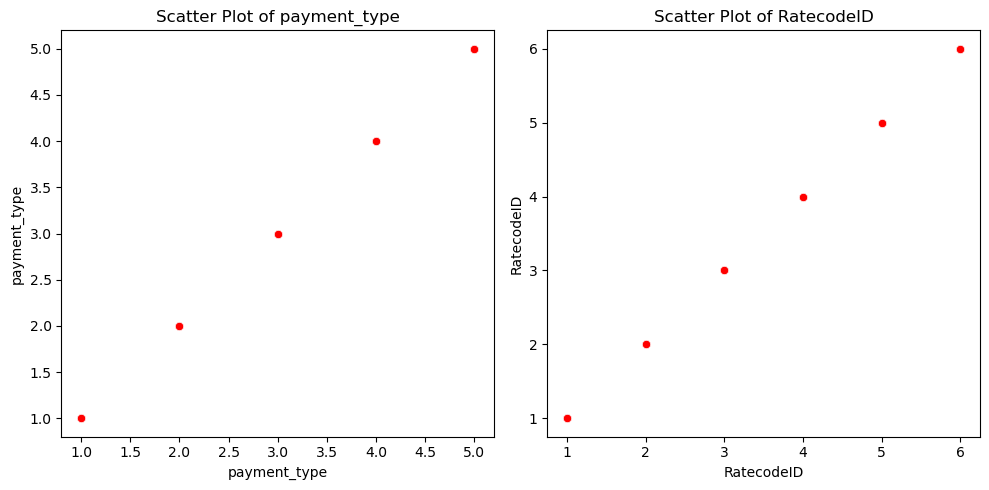

In [57]:
columns_to_plot = jan_df[['payment_type', 'RatecodeID']]

plt.figure(figsize=(10, 5))
for i, column in enumerate(columns_to_plot.columns):
    plt.subplot(1, 2, i + 1)  # 1 rows, 2 columns for the subplots
    sns.scatterplot(data=jan_df, x=column, y=column, color='red')
    plt.title(f'Scatter Plot of {column}')

plt.tight_layout()
plt.show()


__Analysis:__ We can see how the data has changed with the cleaning of the noisy data

### 2.3 Correlation

In [58]:
jan_df.corr()

ValueError: could not convert string to float: 'N'

In [ ]:
fig,ax = plt.subplots(figsize=(18, 18))
axes = sns.heatmap(jan_df.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)

__Analysis:__ By the graph and the table, we can see that there are many columns that are not much co-related. However, fare_amount seems to have a lot of correlation with other columns. 

In [ ]:
correlation = jan_df.corr()
corr_pair = []
threshold = 0.7

for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if correlation.iloc[i, j]>threshold:
            corr_pair.append((correlation.columns[i],
                             correlation.columns[j],
                              correlation.iloc[i, j]))
            
sort_pair = sorted(corr_pair, key=lambda x: x[2], reverse =True)
top_corr = sort_pair[:2]

for pair in top_corr:
    print(f"Correlation of {pair[0]} : {pair[1]} = {pair[2]}")

The Fare_amount and total_amount seems to be highly correlated as they go hand in hand. If the fare_amount increases, the total_amount also rises. The total_amount is basically dependent on the fare_amount.

The mta_tax and improvement_surcharge has a correlation of about 0.84, indicationg a strong positive correlation. Their correlation is high due to the fact that they get automaticaly triggered. 

## Task 3

### 3.1 Feature for the trip being in Rush hour

From the data description we notice that a feature called extra is charged on the trips that are either in the Rush Hour or are Overnight trips. We will be using that to check the rush hour and create a new feature.

Where ever the extra amount exceeded 0.5, then it is in the rush hour or in overnight.

In [ ]:
e = jan_df[jan_df['extra']>0]
e.head(20)

__Note:__ Since we just want the rush hour time and not the overnight one, we will check the ride times and remove the ones that are at night.

In [ ]:
e = jan_df[jan_df['extra'] > 0]
ride_times = e['tpep_pickup_datetime']
print(ride_times)

In [ ]:
jan_df['tpep_pickup_datetime'] = pd.to_datetime(jan_df['tpep_pickup_datetime'])

e = jan_df[jan_df['extra'] > 0]
#Group by hour and count trips
hourly_trip_counts = e.groupby(e['tpep_pickup_datetime'].dt.hour)['VendorID'].count()
#plot by hr
plt.figure(figsize=(10, 6))
plt.bar(hourly_trip_counts.index, hourly_trip_counts.values, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Trip Counts by Hour of Day (Extra > 0)')
plt.show()
# not overnight trips
eo = jan_df[(jan_df['extra'] > 0) & (jan_df['tpep_pickup_datetime'].dt.hour < 24) & (jan_df['tpep_pickup_datetime'].dt.hour > 7)]

hourly_trip_counts = eo.groupby(eo['tpep_pickup_datetime'].dt.hour)['VendorID'].count()

# Create a bar chart to visualize the trip counts by hour
plt.figure(figsize=(10, 6))
plt.bar(hourly_trip_counts.index, hourly_trip_counts.values, color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Trip Counts by Hour of Day (Extra > 0, Not Overnight)')
plt.show()


In [ ]:
e1 = jan_df[jan_df['extra'] > 0]

# getting the hour
e['pickup_hour'] = e['tpep_pickup_datetime'].dt.hour

# Count the number of trips for each hour
hourly_trip_counts = e['pickup_hour'].value_counts()
hourly_trip_counts

In [ ]:
e['pickup_hour'] = e['tpep_pickup_datetime'].dt.hour
jan_df['tpep_pickup_datetime'] = pd.to_datetime(jan_df['tpep_pickup_datetime'])
#jan_df_filtered = jan_df[jan_df['extra'] > 0]

# day of the week (0 = Monday, 6 = Sunday)
e['day_of_week'] = e['tpep_pickup_datetime'].dt.dayofweek

#mask for weekdays (0-4) and weekends (5-6)
weekdays_mask = (e['day_of_week'] >= 0) & (e['day_of_week'] <= 4)
weekends_mask = (e['day_of_week'] >= 5) & (e['day_of_week'] <= 6)

# trips on weekdays
weekday_hourly_trip_counts = e[weekdays_mask]['pickup_hour'].value_counts().sort_index()

#trips on weekends
weekend_hourly_trip_counts = e[weekends_mask]['pickup_hour'].value_counts().sort_index()

# Combine
hourly_trip_counts = pd.concat([weekday_hourly_trip_counts, weekend_hourly_trip_counts], axis=1)
hourly_trip_counts.columns = ['Weekdays', 'Weekends']
hourly_trip_counts.fillna(0, inplace=True)
hourly_trip_counts


In [ ]:
hourly_trip_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Trip Counts by Hour of Day (Weekdays vs. Weekends)')
plt.legend(["Weekdays", "Weekends"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

__Analysis:__ The difference between the rush hours during the weekdays and weekends is clearly visible. 12am - 4am is slighly low during the weekends but 4pm to 9pm is quite high during the weekdays. The data that we are comparing is weekdays(5 days) and weekends(2 days) so the extremely high difference should be neglected 

In [ ]:
hourly_trip_counts.sort_values(by='Weekdays', ascending=False)


In [ ]:
hourly_trip_counts.sort_values(by='Weekends', ascending=False)


__Analysis:__ As we can see most of the trips were in the hour 18. We can consider 16 - 21 as our rush hour on weekdays and 20 - 24 on weekends. I would have considered 0 and 1 as rush hour too but at that time, the overnight charges are applied as well.

In [ ]:
import pandas as pd
jan_df['tpep_pickup_datetime'] = pd.to_datetime(jan_df['tpep_pickup_datetime'])

rush_hour_weekday_start = 16  # 4:00 PM
rush_hour_weekday_end = 21  # 9:00 PM
rush_hour_weekend_start = 20  # 8:00 PM 
rush_hour_weekend_end = 24  # 12:00 PM

#function to check if a trip is during rush hour
def is_rush_hour(pickup_datetime):
    hour = pickup_datetime.hour
    day_of_week = pickup_datetime.dayofweek
    if day_of_week < 5:  # Weekdays
        return rush_hour_weekday_start <= hour <= rush_hour_weekday_end
    else:  # Weekends
        return rush_hour_weekend_start <= hour <= rush_hour_weekend_end

jan_df['is_rush_hour'] = jan_df['tpep_pickup_datetime'].apply(is_rush_hour)
print(jan_df[['tpep_pickup_datetime', 'is_rush_hour']].head())

In [ ]:
jan_df['is_rush_hour'].value_counts()

__Analysis:__ It is clear how 1/3rd of the trips were in the rush hour

### 3.2 Complexity of the trip

In [ ]:
!pip install geopandas
import geopandas as gpd
shapefile_path = 'taxi_zones.shp'
gdf = gpd.read_file(shapefile_path)
gdf

In [ ]:
# Calculate centroids
gdf['centroid'] = gdf['geometry'].centroid

centroid_df = pd.DataFrame({
    'LocationID': gdf['LocationID'],
    'Centroid': gdf['centroid']
})

centroid_df['Latitude'] = centroid_df['Centroid'].apply(lambda point: point.y)
centroid_df['Longitude'] = centroid_df['Centroid'].apply(lambda point: point.x)

#Merge jan_df with centroid_df by PUlocationID
jan_df = jan_df.merge(centroid_df, how='left', left_on='PULocationID', right_on='LocationID')
jan_df = jan_df.rename(columns={'Latitude': 'PU_Latitude', 'Longitude': 'PU_Longitude'})

#for DOlocationID
jan_df = jan_df.merge(centroid_df, how='left', left_on='DOLocationID', right_on='LocationID')
jan_df = jan_df.rename(columns={'Latitude': 'DO_Latitude', 'Longitude': 'DO_Longitude'})

In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    #Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    radius = 3959  # Earth's radius in miles
    #Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c

    return distance

#Calculating the distance
jan_df['trip_distance_pickup_dropoff'] = jan_df.apply(
    lambda row: haversine_distance(
        row['PU_Latitude'], row['PU_Longitude'],
        row['DO_Latitude'], row['DO_Longitude']
    ),axis=1) #gets saved in meters


In [ ]:
#Converting meters to miles
jan_df['straight_line_distance'] = jan_df['trip_distance_pickup_dropoff'] * 0.000621371
jan_df[['trip_distance','straight_line_distance']]

In [ ]:
#Calculating the complexity
jan_df['trip_complexity'] = jan_df['trip_distance'] / jan_df['straight_line_distance']

In [ ]:
#jan_df = jan_df.drop(['Centroid_x','PU_Latitude', 'PU_Longitude','LocationID_y','Centroid_y','DO_Latitude','DO_Longitude'], axis=1)
jan_df

### 3.3 Pickup and Drop off Frequency

In [ ]:
pickup_frequency = jan_df['PULocationID'].value_counts() #pickup frequency 
dropoff_frequency = jan_df['DOLocationID'].value_counts() #drop-off frequency 
#df
pickup_df = pd.DataFrame({'LocationID': pickup_frequency.index, 'Pickup_Frequency': pickup_frequency.values})
dropoff_df = pd.DataFrame({'LocationID': dropoff_frequency.index, 'Dropoff_Frequency': dropoff_frequency.values})
#main df
frequency_df = pickup_df.merge(dropoff_df, on='LocationID', how='outer')
#missing values = 0 
frequency_df = frequency_df.fillna(0).astype({'LocationID': int})
frequency_df

In [ ]:
frequency_df.sort_values(by='LocationID', ascending=True)

In [ ]:
frequency_df.sort_values(by='Pickup_Frequency', ascending=True)

In [ ]:
frequency_df.sort_values(by='Dropoff_Frequency', ascending=True)

In [ ]:
#Plotting pickup frequencies
plt.figure(figsize=(12, 6))
plt.bar(frequency_df['LocationID'], frequency_df['Pickup_Frequency'], alpha=0.5, label='Pickup Frequency')
#Plot drop-off frequencies
plt.bar(frequency_df['LocationID'], frequency_df['Dropoff_Frequency'], alpha=0.5, label='Drop-off Frequency')

plt.xlabel('LocationID')
plt.ylabel('Frequency')
plt.title('Pickup and Drop-off Frequencies by LocationID')
plt.legend()
plt.show()


__Analysis:__ Some of the most popular zones are 
Pickup
   - 132: Queens,JFK Airport
   - 237: Manhattan,Upper East Side South
   - 236: Manhattan,Upper East Side North
  
Dropoff
   - 236: Manhattan,Upper East Side North
   - 237: Manhattan,Upper East Side South
   - 161: Manhattan,Midtown Center
    
Among all 237 and 236 appears to be popular for pickup and dropoff. 

# Task 4

### 4.1 Ranking vendors by their popularity

In [ ]:
popular_vendor = jan_df['VendorID'].value_counts().reset_index()
popular_vendor.columns = ['VendorID', 'Popularity Rank']
print(popular_vendor)

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(popular_vendor['VendorID'], popular_vendor['Popularity Rank'], color='brown')
plt.xlabel('VendorID')
plt.ylabel('Popularity Rank')
plt.title('Vendor Popularity Ranks')
plt.xticks(popular_vendor['VendorID'])
plt.show()


__Analysis:__ The TPEP records were mostly provided by VeriFone Inc

### 4.2 Peak travel hours

In [ ]:
jan_df['tpep_pickup_datetime'] = pd.to_datetime(jan_df['tpep_pickup_datetime'])
jan_df['pickup_hour'] = jan_df['tpep_pickup_datetime'].dt.hour
jan_df['pickup_hour'].value_counts()

In [ ]:
hourly_trip_counts = jan_df['pickup_hour'].value_counts().sort_index()
#Plotting
plt.figure(figsize=(12, 6))
plt.bar(hourly_trip_counts.index, hourly_trip_counts, color='olive')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Peak Travel Hours')
plt.show()


__Analysis:__ We can see how the the peak hours during the day is. It was expected that the peak travel hours would be during the mornings as well but it is mostly during the evening around 8pm. 

### 4.3 Average Distance on Weekdays vs Weekends

In [ ]:
jan_df['day_of_week'] = jan_df['tpep_pickup_datetime'].dt.dayofweek
weekdays_mask = jan_df['day_of_week'] < 5
weekends_mask = jan_df['day_of_week'] >= 5
#mean
average_distance_weekdays = jan_df[weekdays_mask]['trip_distance'].mean()
average_distance_weekends = jan_df[weekends_mask]['trip_distance'].mean()

print("Average Trip Distance on Weekdays:", average_distance_weekdays)
print("Average Trip Distance on Weekends:", average_distance_weekends)


In [ ]:
average_weekdays = 3.7
average_weekends = 4.11
categories = ['Weekdays', 'Weekends']
values = [average_weekdays, average_weekends]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'orange'])
plt.xlabel('Day  Type')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance on Weekdays vs. Weekends')
plt.show()


### 4.4 Average Number of Passengers on Weekdays vs Weekends

In [ ]:
# 4.4
#jan_df['day_of_week'] = jan_df['tpep_pickup_datetime'].dt.dayofweek
#weekdays_mask = jan_df['day_of_week'] < 5
#weekends_mask = jan_df['day_of_week'] >= 5

#average number of passengers for weekdays and weekends
average_passengers_weekdays = jan_df[weekdays_mask]['passenger_count'].mean()
average_passengers_weekends = jan_df[weekends_mask]['passenger_count'].mean()

print("Average Number of Passengers on Weekdays:", average_passengers_weekdays)
print("Average Number of Passengers on Weekends:", average_passengers_weekends)


### 4.5 Correlation of Fare and Tip

In [ ]:
#4.5

print("Correlation of Fare Amount and Tip Amount:", jan_df['fare_amount'].corr(jan_df['tip_amount']))


### 4.6 Correlation of Fare and Passengers

In [ ]:
# 4.6
print("Correlation of Fare Amount and Number of Passengers:", jan_df['fare_amount'].corr(jan_df['passenger_count']))


## Task 5

### 5.1 Key Findings

In this dataset while doing the EDA we were able to understand how the data is organized and how each feature plays a crutial role in analyzing and interpreting. We even understood how the negative data is not always an outlier and it tells us about a situation that may have happened. Treating it as an outlier would give us bad results later on. 

The Noisy data can be anything, it can be negative values, or maybe something that feels like it is in range of the data. Here we learnt that RatecodeID had an outlier of 99 and there were many with that value. 

We even learnt different ways of treating the missing values or noisy data. It's not always that we should drop the missing values, we can also replace it with other numbers.

We found out that the taxi's were mostly used 4-9 on weekdays and 8-12 on weekends. They were also used highly at 12 - 2 on weekends indicating how people would go out and come late at night.

Not only that but the taxis were more used during the weekends than the weekdays. 

Suprisingly the straight - line distance was at times larger than the trip distance. This could probably mean that the point from where the distance was measured were much more further that the trip's point but since it came under that zone, the trip point had to be calculated. 

One major key findings is that the rates of Taxi's have risen over the short period of time. This could be a bit bad for the consumers but we even noticed that the amount of tips paid has decreased.

### 5.2 Challenges 

The Challenges I faced was while figuring out how the noisy data can be treated. Initially the passenger_count for more than 6 was quite less. While randomly allocating  the numbers, they were increasing a lot. This would have created a problem for the analysis. So I had chosen 1% and 0.1 % of the data that would be assigned with 6 or more. Also there were some values where the passenger count was 0, suggesting that the fare was charged but we do not know for how many people.

Moreover, the rush_hour calculations for the weekends and weekdays was a bit confusing as I was first calculating the rush hour only for the day. This would be unfair for the data on the weekends. As we noticed there is a significant difference between the rush hour on the days and weekends. 

Calculating the stright-line distance was something fun and new for me. I learnt on how to calculate the distance using haversine_distance.

### 5.3 Suggestions

The overall assignment was fun to do as it gave us an insight on how the data can be used to extract so many insights. 
There were many areas that were unexplored. We could analyzed store_and_fwd_flag more in detail or understood how the fare_charges works for different zones and hours. 

Moreover, We could even plot the data on a map using Foursquare's API to make it more interactive and analyze what places attrached the passenger to travel there. It could be a park or a restuarant or maybe a museum. 

In [ ]:
#Saving the file
jan_df.to_csv('new_jan.csv',vhvmn index=False)
print("Data Saved!")

## **<p style="text-align: center;">The End!</p>** 
## ***<p style="text-align: center;">Thank You!</p>***